## Predicción Ataque Cardiaco

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.  
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.  
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. 
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo. 
5. Entrenar el modelo configurando los diferentes hiperparámetros. 
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc. 
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo. 
8. Interpretar, analizar y documentar los resultados obtenidos. 

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 

In [1]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression -> Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Diccionarios
#Sexo 
dc_sexo={1:"Hombre",2:"Mujer"}
#Tipo Dolor Toraxico 
dc_tipoDolorToraxico={0:"Angina Típica",1:"Angina Atípica",2:"Dolor No Anguinoso",3:"Asintomático"}
#FBS: (Glucemia en ayunas > 120 mg/dL)
dc_glucemiaAyunas={1:"Verdadero",2:"Falso"}
#resultados electrocardiográficos en reposo
dc_electroEnReposo={0:"Normal",1:"Anormalidad"}
#Angina inducida por el ejercicio
dc_anginaInducidaEjercicio={1:"Sí",0:"No"}
#Pendiente Ejercicio Maximo Segmento ST
dc_pdtEjercicioMaxSeg={0:"Ascendente",1:"Plana",2:"Descendente"}
#thal
dc_thal={0:"Normal",1:"Subsanado",2:"Reversible"}
#Condicion
dc_condicion={0:"Sin Enfermedad",1:"Enfermedad"}
#Traduccion
dic_colsESP={
    'age':'Edad', 'sex':'Genero', 'cp':'Tipo Dolor Cardiaco'
    , 'trestbps':'Presion Arterial Reposo', 'chol':'Colesterol Serico mg/dl', 'fbs':'Glucemia ayunas > 120 mg/dL'
    , 'restecg':'Resultados Electrocardiográficos Reposo', 'thalach':'Frecuencia Cardíaca Max', 'exang':'Angina Inducida por Ejercicio'
    , 'oldpeak':'Depresión del segmento ST', 'slope':'Pendiente Ejercicio máx segmento ST', 'ca':'Vasos Coloreados por Fluorosopía'
    , 'thal':'Talasemia', 'condition':'Enfermedad Cardiaca'
}

In [3]:
datos=pd.read_csv('heart_cleveland_upload.csv')
#Renombrar Campos
datos = datos.rename(columns=dic_colsESP)
#Validamos si tenemos valores nulos y el tipo de dato de cada columna
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Edad                                     297 non-null    int64  
 1   Genero                                   297 non-null    int64  
 2   Tipo Dolor Cardiaco                      297 non-null    int64  
 3   Presion Arterial Reposo                  297 non-null    int64  
 4   Colesterol Serico mg/dl                  297 non-null    int64  
 5   Glucemia ayunas > 120 mg/dL              297 non-null    int64  
 6   Resultados Electrocardiográficos Reposo  297 non-null    int64  
 7   Frecuencia Cardíaca Max                  297 non-null    int64  
 8   Angina Inducida por Ejercicio            297 non-null    int64  
 9   Depresión del segmento ST                297 non-null    float64
 10  Pendiente Ejercicio máx segmento ST      297 non-n

In [4]:
#Aqui podemos idfdentificar si hay valores atipicos
datos.describe()

,Edad,Genero,Tipo Dolor Cardiaco,Presion Arterial Reposo,Colesterol Serico mg/dl,Glucemia ayunas > 120 mg/dL,Resultados Electrocardiográficos Reposo,Frecuencia Cardíaca Max,Angina Inducida por Ejercicio,Depresión del segmento ST,Pendiente Ejercicio máx segmento ST,Vasos Coloreados por Fluorosopía,Talasemia,Enfermedad Cardiaca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


<Axes: xlabel='Enfermedad Cardiaca'>

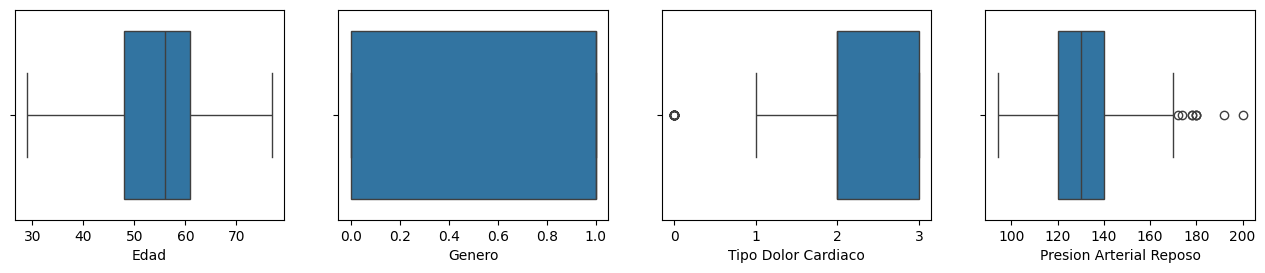

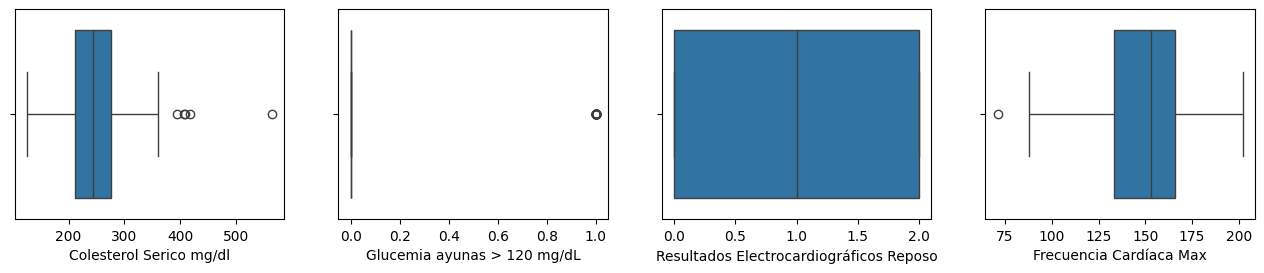

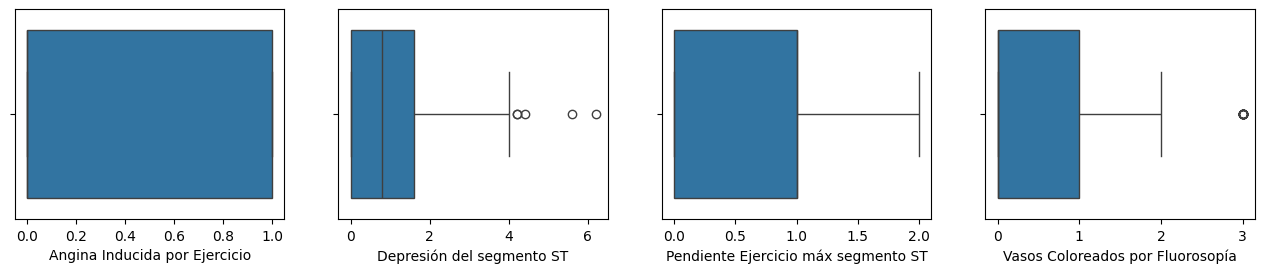

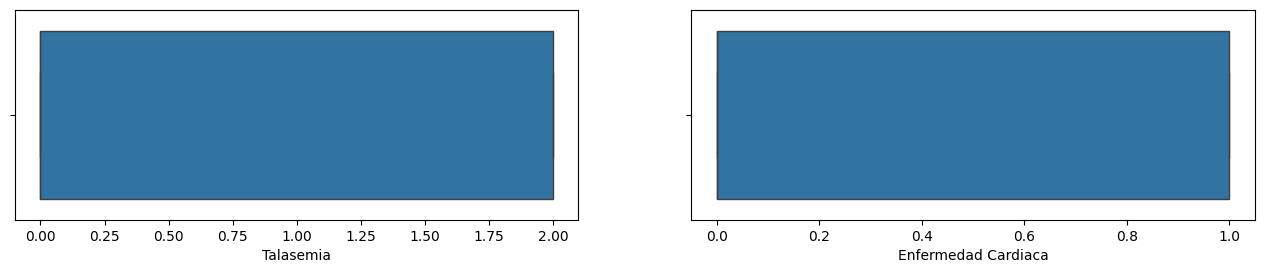

In [5]:
#Identificando Valores Atipicos de Manera Visual
plt.figure(figsize=(16, 6))
plt.subplot(2, 4, 1)
sns.boxplot(x=datos['Edad'])

plt.subplot(2, 4, 2)
sns.boxplot(x=datos['Genero'])

plt.subplot(2, 4, 3)
sns.boxplot(x=datos['Tipo Dolor Cardiaco'])

plt.subplot(2, 4, 4)
sns.boxplot(x=datos['Presion Arterial Reposo'])

plt.figure(figsize=(16, 6))
plt.subplot(2, 4, 1)
sns.boxplot(x=datos['Colesterol Serico mg/dl'])

plt.subplot(2, 4, 2)
sns.boxplot(x=datos['Glucemia ayunas > 120 mg/dL'])

plt.subplot(2, 4, 3)
sns.boxplot(x=datos['Resultados Electrocardiográficos Reposo'])

plt.subplot(2, 4, 4)
sns.boxplot(x=datos['Frecuencia Cardíaca Max'])

plt.figure(figsize=(16, 6))
plt.subplot(2, 4, 1)
sns.boxplot(x=datos['Angina Inducida por Ejercicio'])

plt.subplot(2, 4, 2)
sns.boxplot(x=datos['Depresión del segmento ST'])

plt.subplot(2, 4, 3)
sns.boxplot(x=datos['Pendiente Ejercicio máx segmento ST'])

plt.subplot(2, 4, 4)
sns.boxplot(x=datos['Vasos Coloreados por Fluorosopía'])

plt.figure(figsize=(16, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x=datos['Talasemia'])

plt.subplot(2, 2, 2)
sns.boxplot(x=datos['Enfermedad Cardiaca'])


## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

In [6]:
#Datos atipicos evidenciados
#Presion Arterial en Reposo. ponemos un techo de 170 (min 70)
#presionArterial_min=70
#presionArterial_max=170

#atipPresionArterial=(datos['Presion Arterial Reposo']<presionArterial_min)|(datos['Presion Arterial Reposo']>presionArterial_max).sum()
#print('valores atipicos Presion Arterial Reposo {}'.format(atipPresionArterial))
#Colestero Serico Lo Alto son 200. Ponemos un techo 200 (min 60)
#colesterolSerico_min=60
#colesterolSerico_max=200
#atipColesterolSerico=(datos['Colesterol Serico mg/dl']<colesterolSerico_min)|(datos['Presion Arterial Reposo']>colesterolSerico_max).sum()
#print('valores atipicos Colesterol Serico mg/dl {}'.format(atipColesterolSerico))
#datos.info()
#filtrar los datos 
#datos=datos[(datos['Colesterol Serico mg/dl']<colesterolSerico_max)&(datos['Colesterol Serico mg/dl']>colesterolSerico_min)]
#datos=datos[(datos['Presion Arterial Reposo']<presionArterial_max)&(datos['Presion Arterial Reposo']>presionArterial_min)]

#datos.info()
#datos.describe()



## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [7]:
# Campos Elegidos 'Enfermedad Cardiaca'

datos["Enfermedad Cardiaca"].value_counts()


Enfermedad Cardiaca
0    160
1    137
Name: count, dtype: int64

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [8]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = datos.drop('Enfermedad Cardiaca',axis=1) # Se cargan los datos de train sin los datos de la columna Enfermedad Cardiaca 
Y = datos['Enfermedad Cardiaca'] # Se cargan los datos de train con los datos de la la columna Enfermedad Cardiaca

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

## 5. Entrenar el modelo configurando los diferentes hiperparámetros.


In [9]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [10]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

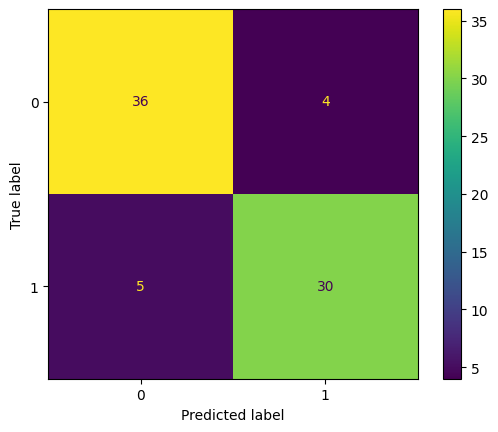

In [11]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


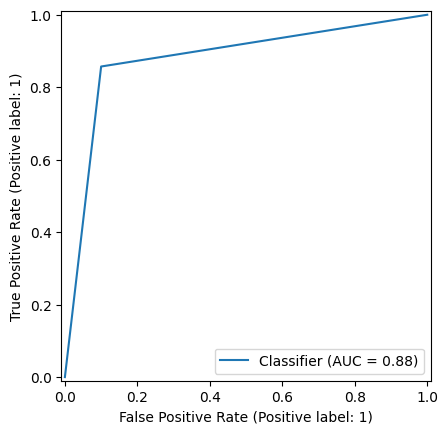

In [12]:
# Curva de precisón del modelo

RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos

**Podemos concluir que el desempeño del modelo fue muy aceptable debido a:**

 * **Precision:** La precision para la clase NO ENFERMEDAD CARDIACA es del 88%, lo que indica que el 88% de las predicciones de esta clase realmente eran NO ENFERMEDAD CARDIACA.  En cuanto a clase ENFERMEDAD CARDIACA, la precision tambien fue del 88%

 * **Recall:** El Recall para la clase NO ENFERMEDAD CARDIACA fue del 90%, indicando que el 90% de las instancias indicadas bajo esta clase fueron correctas. En cuanto a la clase ENFERMEDAD CARDIACA fue del 86%.

 * **F1-Score:** Para la clase NO ENFERMEDAD CARDIACA la media armonica es del 89% y para la clase ENFERMEDAD CARDIACA es del 87%.

 * **Support:**  El numero de ocurrencias reales de cada clase en los datos de prueba es 40 de la clase NO ENFERMEDAD CARDIACA y 35 de la clase ENFERMEDAD CARDIACA.

 **Podemos concluir que el modelo...**

* [0:0] 36 veces predijo que el usuario NO tenia enfermedad cardiaca y efectivamente, era asi.
* [1:1] 30 veces predijo que el usuario tenia enfermedad cardiaca y efectivamente, era asi.
* [0:1] 5 veces predijo que el usuario no tenia enfermedad cardiaca pero si tenia la condicion.
* [1:0] 4 veces predijo que el usuario tenia enfermedad cardiaca pero no la tenia.

En el grafico de la curva de precisión del modelo se puede interpretar que el 88% de las predicciones, **la clasificacion fue correcta para todos los umbrales de clasificacion.**